## Choice of activation function

Nonlinearity of the activation function combined with the compositional structure of neural networks is essentially what allows them to approximate highly nonlinear target functions. Nonlinearity alone, however, is just too broad of a criterion to be useful in narrowing down our search for a proper activation function: almost any function (but a linear one) fits the bill. In this Section we describe general desirable properties to consider when choosing or designing a proper activation function.

In [2]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
from mlrefined_libraries import nonlinear_superlearn_library as nonlib

# import basic plotting mechanisms
import matplotlib.pyplot as plt
from matplotlib import gridspec

# This is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

# autoreload function - so if anything behind the scenes is changeed those changes
# are reflected in the notebook without having to restart the kernel
%load_ext autoreload
%autoreload 2

#### Property 1. A good activation function shouldn't be highly nonlinear itself!








One critical challenge we always face in nonlinear machine learning is choosing the right model capacity. Otherwise, underfitting (smaller than ideal capacity) or overfitting (larger than ideal capacity) is afoot. Take a single-hidden-layer neural network for instance. The capacity in this case is determined by the number of units used in the hidden layer: the larger the number of units the higher the capacity. The right amount of capacity then corresponds to 









Recall from our discussion of boosting in Chapter 12 that 


The capacity of a multilayer perceptron is directly impacted by nonlinearity of the activation function used to create it. When choosing the right capacity for a given problem          



The capacity of a neural network model/architecture is directly tied to the nonlinearity of the activation function used to create it. Highly nonlinear activation functions create high capacity models. The capacity    


the activation function the higher capacity Ideally one should use 'minimally nonlinear' activation functions because   





Suppose we want to use a single-hidden-layer neural network to perform a certain supervised learning task. In order to find the 'right' number of neural network units we use boosting, each time adding a single unit to the model and compute some sort of validation error for it. The number of units     
 






tune the right number of units in a single-hidden-layer neural network for a certain supervised learning task via boosting. At each step of the process you add a single unit to the model and compute some sort of validation error     tune the number 

In general we want the activation function to be "minimally nonlinear" as this gives us a finer control when choosing 




#### <span style="color:#a50e3e;">Example 1. </span>  The Sinc function as activation.

From a historical perspective the very first neural networks were largely designed by neuroscientists who knew that a biological neuron would fire (or become 'active') only when its input exceeded a certain threshold. This biological observation motivated the use of a 0/1 (or Heaviside) step function in the early neural networks including the original perceptron model [[3]](#bib_cell). Being both discontinuous and completely flat over its domain, a 0/1 step function rules out the use of first order optimization methods that rely on gradient information (the gradient of a step function at any point is either zero or undefined). 

Replacing the step function with a smooth approximation of it fixes these issues. This is why, a few decades later, the logistic sigmoid function as well as its differently-scaled variants (like the hyperbolic tangent function) became the default choice of activation. 

While logistic functions allow the application of gradient descent, they suffer from a different technical flaw: the gradient of a logistic function is effectively zero outside a relatively small region near the origin, causing the cost function to have exceedingly flat regions where the gradient is zero or vanishingly small.




With the recent resurgence of neural networks as deep learning and use of new activation functions such as ReLU, the trend in the machine learning community to sacrifice biological plausibility to gain better optimization - and consequently better accuracy - has continued.
 

A few decades later Three decades later researchers ameliorated this issue by dropping the step function in favor of its smooth approximator: the logistic sigmoid function. However it turns out the sigmoid function too suffers from an optimization-related flaw: the gradient of the sigmoid function is effectively zero outside a relatively small region near the origin. With the recent resurgence of neural networks as deep learning and use of new activation functions such as ReLU, the trend in the machine learning community to sacrifice biological plausibility to gain better optimization - and consequently better accuracy - has continued.

interested in of the brain can help us choose a mathematical form for the activation function $a\left(\cdot\right)$. As discussed in the previous Subsection, 




What properties make must an effective activation function possess? The hyperbolic tangent function (tanh) and the rectified linear unit (ReLU) are two popular activation functions used to create multi-layer perceptrons as well as other deep learning architectures we will see in the chapters to come. In this Subsection we briefly discuss how these functions became the default choice  from a historical perspective  We have seen a number of popular activation functions that  

<IPython.core.display.Javascript object>


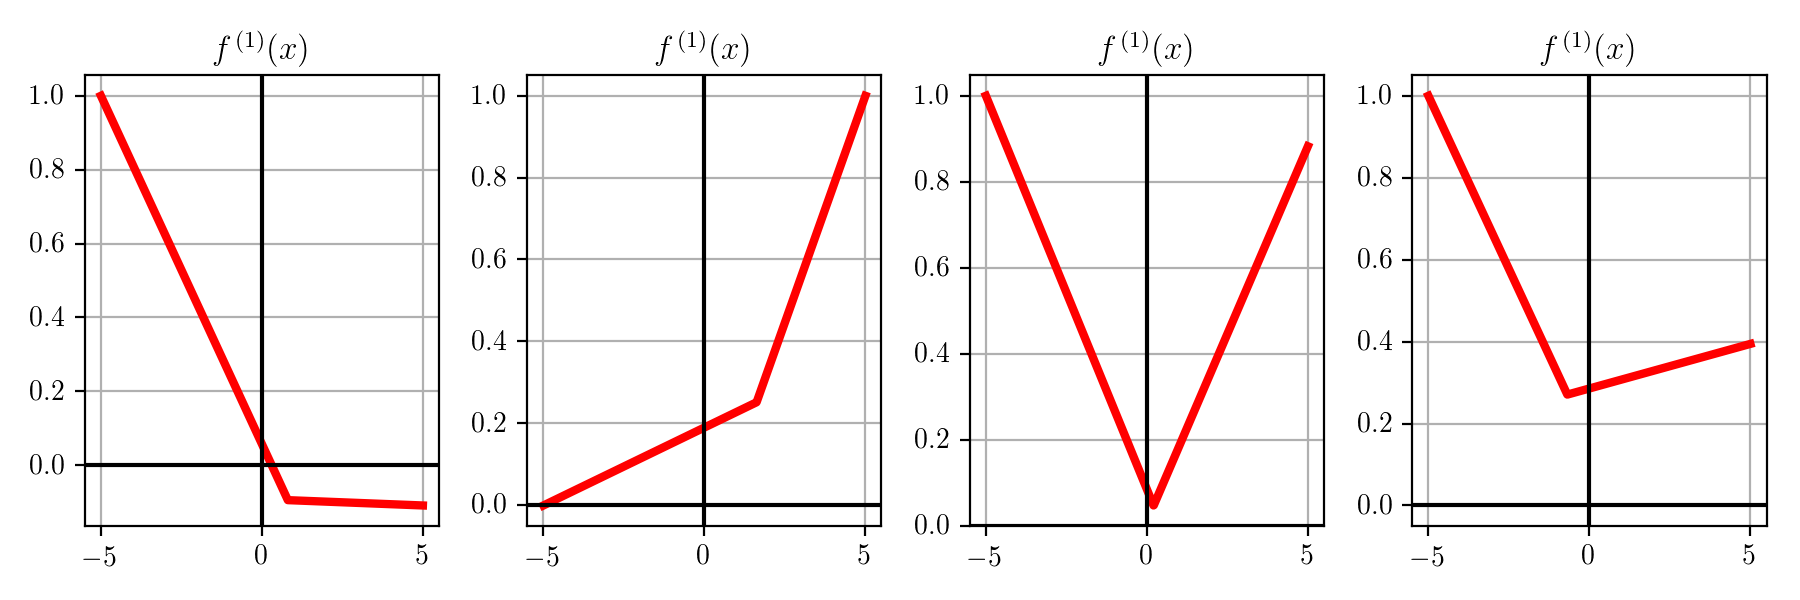

In [11]:
# This code cell will not be shown in the HTML version of this notebook
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of a single hidden layer basis
demo.show_1d_net(num_layers = 1, activation = 'maxout')

#### <span style="color:#a50e3e;">Example 1. </span>  The natural exponential function as activation.

#### <span style="color:#a50e3e;">Example 1. </span>  The step function as activation. 

#### <span style="color:#a50e3e;">Example 1. </span>  The hyperbolic tangent function as activation. 

### Stability issue

<IPython.core.display.Javascript object>


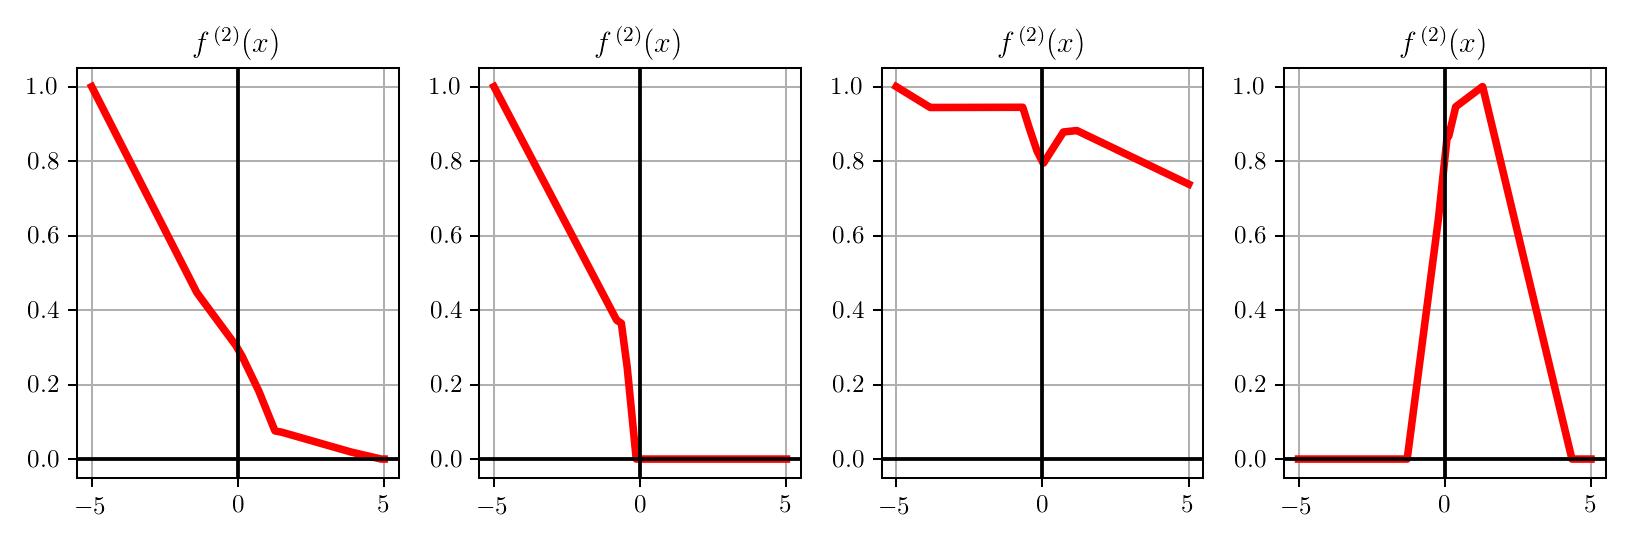

In [9]:
# This code cell will not be shown in the HTML version of this notebook
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of a single hidden layer basis
demo.show_1d_net(num_layers = 2, activation = 'relu')


Finally, the `activation` can be set to a variety of functions, like `tanh`, `relu`.

So far we have seen various activation functions, most notably the tanh and relu functions defined below

\begin{array}
\
a(x) = \text{tanh}(w_0 + w_1x) \\
a(x) = \text{max}(0,w_0 + w_1x) \\
\end{array}

Here you will implement the so-called [*maxout* activation](https://arxiv.org/pdf/1302.4389.pdf).  This function, defined as

\begin{array}
\
a(x) = \text{max}(v_0 + v_1x, \,w_0 + w_1x) \\
\end{array}

takes maximum of two linear combinations of the input, instead of one linear combination and zero like the relu function.  While this change is algebraically rather minor, multilayer perceptron architectures employing the *maxout* activation tends to have certain advantages over those employing tanh and relu activations, including

- fewer issues with problematic initialization  e.g., values close too (or equal to) zero for the *relu* activation are bad because the relu is minimized at zero

- fewer issues with gradients vanishing or exploding, as can occur when using the tanh activation

- faster convergence with far fewer gradient descent steps

These advantages come with a simple price: the maxout activation has twice as many internal parameters as either the relu or tanh, hence architectures built with them have roughly twice as many parameters to tune.

<a id='bib_cell'></a>

## References

[1]  W. S. McCulloch and W. Pitts. A logical calculus of the ideas immanent in nervous activity. The bulletin of mathematical biophysics, 5(4):115–133, 1943.

[2]  D. O. Hebb. The organization of behavior: a neuropsychological theory. John Wiley & Sons, New York, 1949.

[3]  F. Rosenblatt. The perceptron - a perceiving and recognizing automaton. Cornell Aeronautical Laboratory, 1957.

[4]  B. Merker. From probabilities to percepts: a subcortical "global best estimate buffer" as locus of phenomenal experience". In: S. Edelman, T. Fekete and N. Zach (Eds.) Being in time: Dynamical models of phenomenal experience. (pp. 37–79). John Benjamins Publishing Company, Amsterdam, 2012.